In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
fontsize = 22
labelsize = 18

In [5]:
df = pd.read_csv("data/output/result.csv", header=None)
df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'param_s']
print(df.shape)
df

(240, 11)


,algo,bucket update time,core,dataset,degree call time,execution time,neighborhood call time,num bucket update,num degree computation,num neighborhood computation,param_s
0,naive_nbr,0.000038,"{'7': 1, '1': 3, '6': 3, '9': 3, '8': 3, '5': ...",syn,0.000000,0.007451,0.000303,15.0,0.0,15.0,0.0
1,naive_degree,0.000038,"{'6': 1, '7': 1, '5': 1, '8': 1, '9': 2, '1': ...",syn,0.000137,0.008549,0.000000,15.0,15.0,0.0,0.0
2,naive_nbr,0.000033,"{'MP': 1, 'MA': 1, 'GP': 1, 'JA': 2, 'TH': 2, ...",default,0.000000,0.009277,0.000182,13.0,0.0,13.0,0.0
3,improved2_nbr,0.000018,"{'TH': 2, 'JA': 2, 'FN': 2, 'JV': 6, 'BM': 6, ...",default,0.000000,0.010606,0.000402,5.0,0.0,26.0,2.0
4,improved2_nbr,0.000013,"{'JV': 6, 'BM': 6, 'JU': 6, 'CH': 6, 'BR': 6, ...",default,0.000000,0.012312,0.000401,3.0,0.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
235,improved2_nbr,0.000000,{},syn,0.000000,0.002076,0.000000,0.0,0.0,0.0,10.0
236,improved2_nbr,0.000000,{},syn,0.000000,0.002084,0.000000,0.0,0.0,0.0,10.0
237,improved2_nbr,0.000000,{},syn,0.000000,0.002211,0.000000,0.0,0.0,0.0,10.0
238,improved2_nbr,0.000000,{},syn,0.000000,0.002076,0.000000,0.0,0.0,0.0,10.0


### sample plotting

No handles with labels found to put in legend.


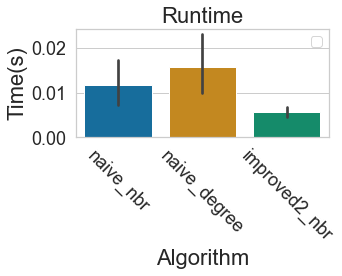

<Figure size 360x288 with 0 Axes>

In [19]:
os.system("mkdir -p data/output/fig")
save = False # True 


sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("whitegrid", {'axes.grid' : True})



sns.barplot( x='algo', y='execution time', data=df, palette='colorblind')
plt.xlabel('Algorithm', fontsize=fontsize)
plt.ylabel('Time(s)', fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=labelsize, rotation=-45)
plt.yticks(fontsize=labelsize)

plt.title("Runtime", fontsize=fontsize)
plt.legend(loc='best', fontsize=labelsize-4)
plt.tight_layout()
if(save):
    plt.savefig("output/fig/runtime.pdf")
else:
    plt.show()
plt.clf()


### Effect of parameter "s" in improved2_nbr

No handles with labels found to put in legend.
default_bucket_update_time


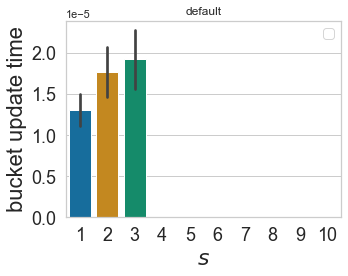

No handles with labels found to put in legend.
default_execution_time


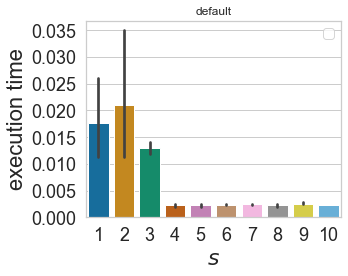

No handles with labels found to put in legend.
default_neighborhood_call_time


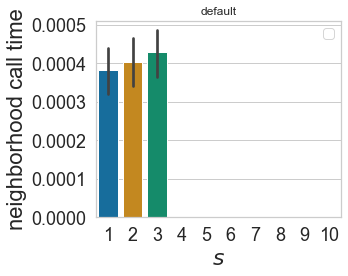

No handles with labels found to put in legend.
default_num_bucket_update


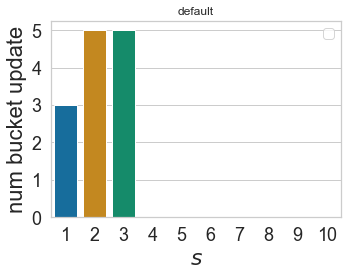

No handles with labels found to put in legend.
default_num_neighborhood_computation


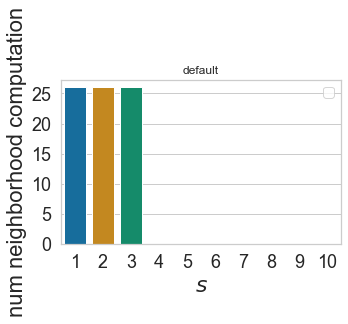

In [29]:
save = False

group_list = ['dataset']
for key, item in df[df['algo'] == "improved2_nbr"].groupby(group_list, as_index=False):
    # key contains dataset
    item['param_s'] = item['param_s'].astype(int)

    for y_axis in ['bucket update time', 'execution time', 'neighborhood call time', 'num bucket update', 'num neighborhood computation']:

        sns.barplot(x='param_s', y=y_axis, data=item, palette='colorblind')
        plt.xlabel(r'$s$', fontsize=fontsize)
        plt.ylabel(y_axis, fontsize=fontsize)
        # plt.yscale("log")
        plt.xticks(fontsize=labelsize)
        plt.yticks(fontsize=labelsize)

        plt.title(key)
        plt.legend(loc='best', fontsize=labelsize-4)
        plt.tight_layout()
        filename = (key + " " + y_axis).replace(" ", "_")
        print(filename)
        if(save):
            plt.savefig("output/fig/" + filename + ".pdf")
        else:
            plt.show()

    # Commnet out following to see full results
    if(not save):
        break


In [28]:
df.columns

Index(['algo', 'bucket update time', 'core', 'dataset', 'degree call time',
       'execution time', 'neighborhood call time', 'num bucket update',
       'num degree computation', 'num neighborhood computation', 'param_s'],
      dtype='object')